In [15]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

pymgpipe_nmpcs = pd.read_csv('pymgpipe_nmpcs.csv',index_col=0)
mgpipe_nmpcs = pd.read_csv('mgpipe_nmpcs.csv',index_col=0)

x = mgpipe_nmpcs.melt()['value'].values
y = pymgpipe_nmpcs.melt()['value'].values

Diff mean- 5.373195004580035e-07
Diff std- 1.2295891576746849e-05


Text(0.5, 0, 'mgpipe NMPCs')

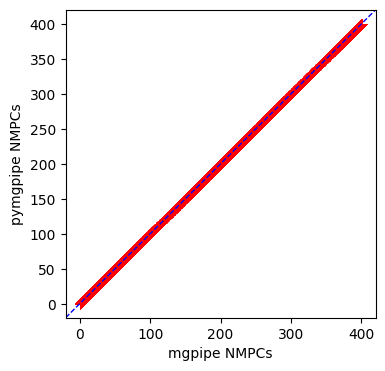

In [16]:
import seaborn as sns 
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(4,4))

print('Diff mean-',(x-y).mean())
print('Diff std-', (x-y).std())
ax = sns.scatterplot(x=x,y=y, s=50, color='red', marker='+')
ax.axline((0, 0), slope=1,color='blue',linestyle='--',lw=1)
ax.set_ylabel('pymgpipe NMPCs')
ax.set_xlabel('mgpipe NMPCs')

0.001452456057247531


/var/folders/vh/_cx7ykss47l99rjhwcpmq7r40000gn/T/ipykernel_85382/1185559408.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels)


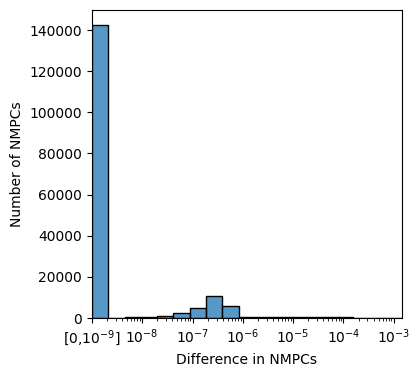

In [20]:
fig = plt.figure(figsize=(4,4))

diff = abs(np.array(x-y))
diff[diff<10e-10] = 10e-10
print(np.max(diff))

plt.xlim(left=10e-10,right=np.max(diff))
ax = sns.histplot(data=diff,log_scale=True)

# changes first x-tick label
x_tick_labels = ax.get_xticklabels()
x_tick_labels[1].set_text('[0,%s]'%'$\mathdefault{10^{-9}}$')
ax.set_xticklabels(x_tick_labels)

plt.ylabel('Number of NMPCs')
plt.xlabel('Difference in NMPCs')

fig.savefig('../figure.png', dpi=1000,transparent=False,bbox_inches='tight')